# intern2grow Internship Task1 BY Mohamed Batran
## EDA for Sales Dataset

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

### Load and Inspect Data 

In [52]:
df = pd.read_csv('sales_data.csv')

In [4]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [5]:
df.columns

Index(['date', 'product', 'category', 'price', 'quantity', 'revenue'], dtype='object')

In [6]:
df.shape

(369, 6)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


### Data Cleaning

In [53]:
# Change date column from object type to date type
df['date'] = pd.to_datetime(df['date'])

In [18]:
# check nulls
df.isna().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [54]:
# replace nulls with price average
price_mean = df['price'].mean()
df['price'].fillna(price_mean,inplace=True)

In [55]:
# replace nulls with revenue average
revenue_mean = df['revenue'].mean()
df['revenue'].fillna(quantity_mean,inplace=True)

In [56]:
# drop null in quantity column
df.dropna(inplace=True)

In [57]:
df.isna().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

In [34]:
# check duplicates
df.duplicated().sum()

1

In [58]:
df[df.duplicated()]

,date,product,category,price,quantity,revenue
276,2022-10-01,Hoodie,Clothing,40.0,30.0,1200.0


In [37]:
# drop duplicates
df.drop_duplicates(inplace=True)

## EDA

### Answer The Task Questions

In [84]:
#1: What was the total revenue generated by the company over the course of the year?
Total_revenue = df['revenue'].sum()
print('Total revenue = ', Total_revenue)

Total revenue =  751744.5652173914


In [88]:
#2: Which product had the highest revenue? How much revenue did it generate?
df.groupby('product').max()['revenue'].sort_values(ascending=False).head(1)

product
Smartphone    7200.0
Name: revenue, dtype: float64

In [90]:
#3: What was the average price of a product sold by the company?
df.groupby('product').mean()['price'].round(1).sort_values(ascending=False)

product
Laptop        1200.0
Smartphone     600.0
Tablet         400.0
Smartwatch     200.0
Watch          152.8
Coat           100.0
Headphones     100.0
Sneakers        80.0
Speaker         80.0
Backpack        50.0
Jeans           50.0
Wallet          45.1
Hoodie          40.0
T-Shirt         20.0
Name: price, dtype: float64

In [91]:
#4: What was the total quantity of products sold by the company?
Total_quantity = df['quantity'].sum()
print('Total quantity = ', Total_quantity)

Total quantity =  5360.0


In [92]:
#5: Which category had the highest revenue? How much revenue did it generate?
df.groupby('category').max()['revenue'].sort_values(ascending=False).head(1)

category
Electronics    7200.0
Name: revenue, dtype: float64

In [95]:
#6: What was the average revenue per sale?
average_revenue_per_sale = df['revenue'].mean().round(3)
print('average_revenue_per_sale = ',average_revenue_per_sale)

average_revenue_per_sale =  2042.784


In [100]:
#7: What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)
df['quarter'] = df['date'].dt.quarter
quarterly_revenue = df.groupby('quarter')['revenue'].sum().round(2)
print(quarterly_revenue)

quarter
1    182100.00
2    177384.57
3    197680.00
4    194580.00
Name: revenue, dtype: float64


###  make more statstical analysis on data

In [137]:
# get sum of revenue, quantity and price per each category
df.groupby('category').sum()[{'revenue','quantity','price'}].sort_values(by='quantity', ascending=False).round(1)

,quantity,revenue,price
category,,,
Clothing,2251.0,94350.0,6380.0
Electronics,1439.0,509480.0,56700.0
Accessories,962.0,104714.6,11102.5
Bags,390.0,19500.0,1150.0
Shoes,258.0,20640.0,1840.0
Clohting,30.0,1200.0,40.0
Bgas,18.0,900.0,50.0
Shoeses,12.0,960.0,80.0


In [138]:
# get sum of revenue, quantity and price per each product
df.groupby('product').sum()[{'revenue','quantity','price'}].sort_values(by='quantity', ascending=False).round(1)

,quantity,revenue,price
product,,,
T-Shirt,1005.0,20100.0,760.0
Smartphone,713.0,427800.0,48600.0
Hoodie,525.0,21000.0,960.0
Speaker,496.0,39680.0,2000.0
Wallet,440.0,13200.0,541.2
Jeans,413.0,20650.0,1200.0
Backpack,408.0,20400.0,1200.0
Coat,338.0,33800.0,3500.0
Smartwatch,304.0,58814.6,7200.0


In [45]:
# statstical data for numerical columns
df.describe().round(1)

,price,quantity,revenue
count,365.0,365.0,365.0
mean,210.6,14.5,2047.2
std,226.9,8.5,1905.7
min,20.0,3.0,14.6
25%,50.0,8.0,750.0
50%,100.0,12.0,1200.0
75%,200.0,20.0,2400.0
max,1200.0,50.0,7200.0


### Discover more about data with visualizations

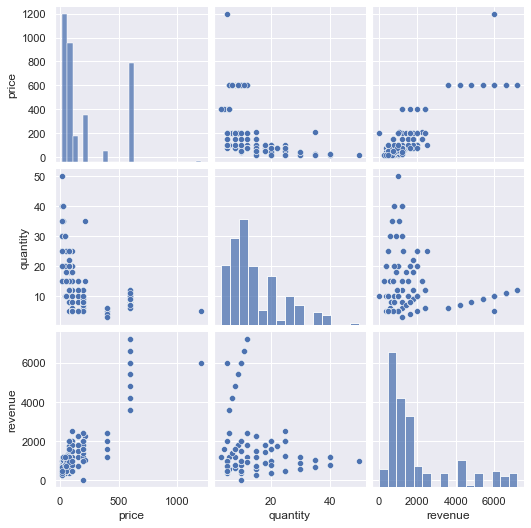

In [105]:
sns.pairplot(df)

In [144]:
px.scatter(data_frame=df,x='revenue',y='quantity',title='Revenue VS Quantity')

In [145]:
px.scatter(data_frame=df,x='revenue',y='price',title='Price VS Revenue')

In [146]:
px.scatter(data_frame=df,x='price',y='quantity',title='Price VS Quantity')

<AxesSubplot: title={'center': 'Revenue Distribution'}, xlabel='revenue', ylabel='Density'>

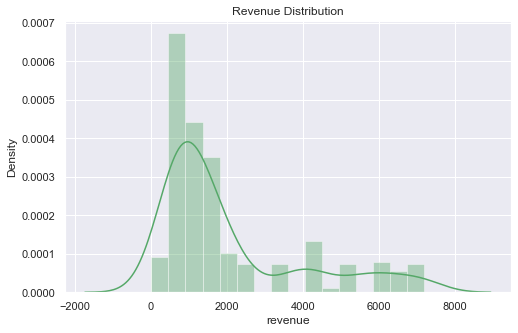

In [147]:
plt.figure(figsize=(8,5))
plt.title('Revenue Distribution')
sns.distplot(df['revenue'],color='g')

<AxesSubplot: title={'center': 'Quantity Distribution'}, xlabel='quantity', ylabel='Density'>

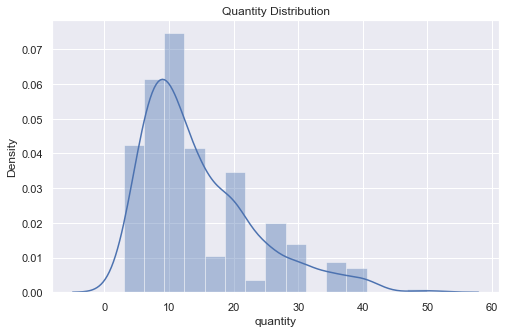

In [148]:
plt.figure(figsize=(8,5))
plt.title('Quantity Distribution')
sns.distplot(df['quantity'],color='b')

<AxesSubplot: title={'center': 'Price Distribution'}, xlabel='price', ylabel='Density'>

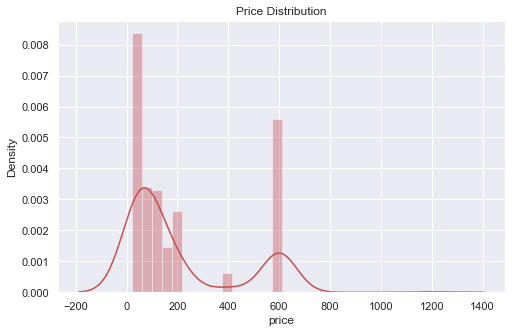

In [149]:
plt.figure(figsize=(8,5))
plt.title('Price Distribution')
sns.distplot(df['price'],color='r',bins=30)

<AxesSubplot: title={'center': 'Category Count'}, xlabel='category', ylabel='count'>

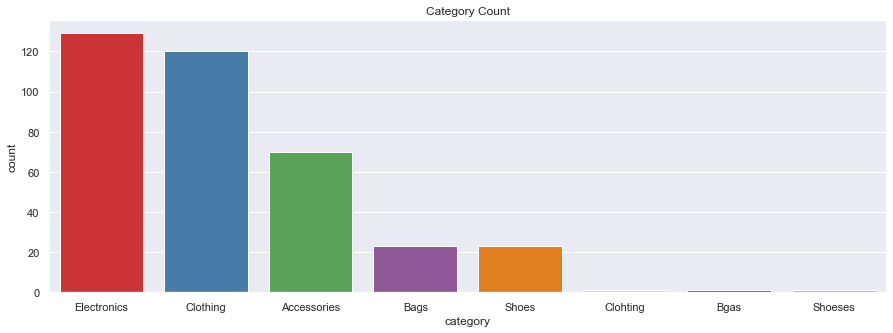

In [150]:
plt.figure(figsize=(15,5))
plt.title('Category Count')
sns.countplot(data=df,x='category',palette='Set1')

<AxesSubplot: title={'center': 'Product Count'}, xlabel='product', ylabel='count'>

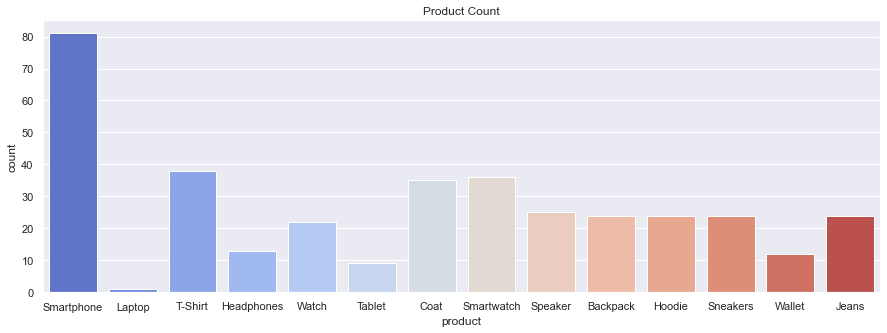

In [151]:
plt.figure(figsize=(15,5))
plt.title('Product Count')
sns.countplot(data=df,x='product',palette='coolwarm')

In [152]:
px.line(data_frame=df,x='date',y='revenue',title='Revenue Grwoth')

In [153]:
px.line(data_frame=df,x='date',y='quantity',title='Quantity Grwoth')

In [154]:
px.bar(data_frame=df,x='category',y='revenue',title='Revenue Per Category')

In [155]:
px.bar(data_frame=df,x='product',y='revenue',title='Revenue Per Product')

<AxesSubplot: title={'center': 'Variables Correlation'}>

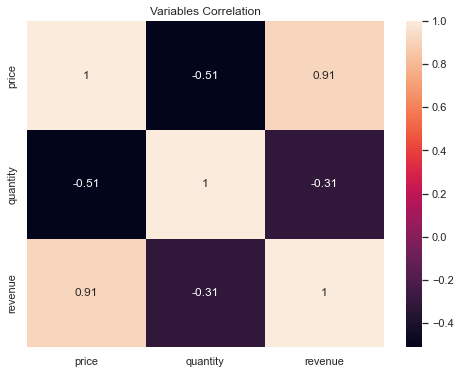

In [156]:
plt.figure(figsize=(8,6))
plt.title('Variables Correlation')
sns.heatmap(df.corr(),annot=True)

## -----Finish---------